<a href="https://colab.research.google.com/github/AndreAEAA/Repositorio_IA/blob/main/ARBOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('/content/housing.csv')  # Sube el archivo housing.csv al entorno de Colab


In [ ]:
df.dropna(inplace=True)
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'], dtype=int)], axis=1)
df.drop('ocean_proximity', axis=1, inplace=True)
df['bedroom_ratio'] = df['total_rooms'] / df['total_bedrooms']


In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Árbol de Decisión - Score: 0.663051571260893
Árbol de Decisión - RMSE: 67881.0038124241


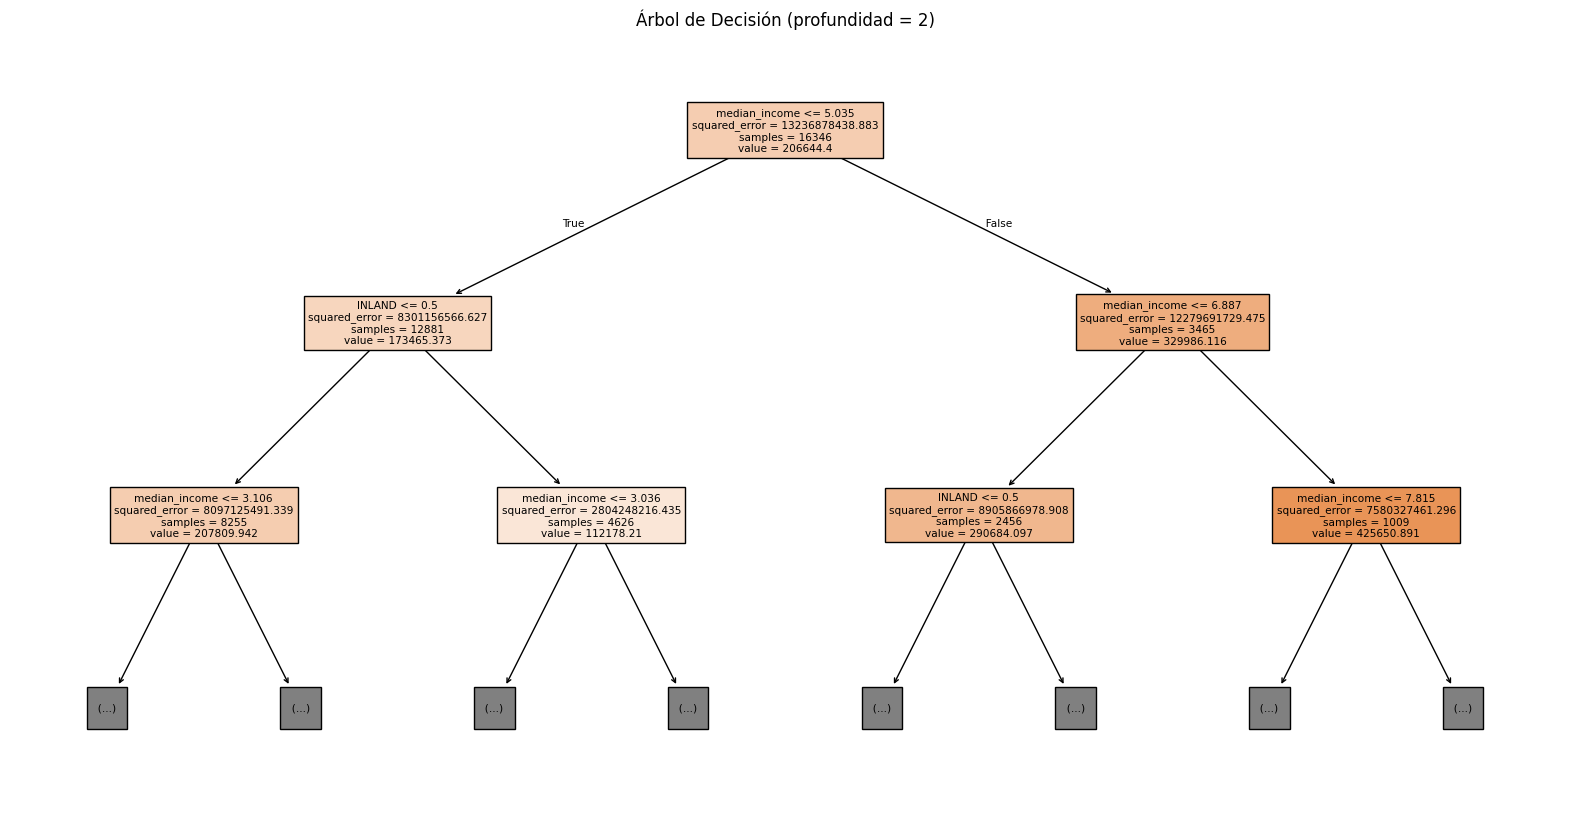

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_score = tree_model.score(X_test, y_test)
tree_predictions = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))

print("Árbol de Decisión - Score:", tree_score)
print("Árbol de Decisión - RMSE:", tree_rmse)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, max_depth=2)
plt.title("Árbol de Decisión (profundidad = 2)")
plt.show()


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)
svm_score = svm_model.score(X_test_scaled, y_test)
svm_predictions = svm_model.predict(X_test_scaled)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))

print("SVM - Score:", svm_score)
print("SVM - RMSE:", svm_rmse)


SVM - Score: 0.2958919268116337
SVM - RMSE: 98126.47549854888
